In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt

In [4]:
#From pc read csv file the data
dataset=pd.read_csv("C:/Users/MyPc/Documents/Python Scripts/Iris.csv")
# first 5 rows by default Show with Columns names
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data = dataset.loc[: , ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

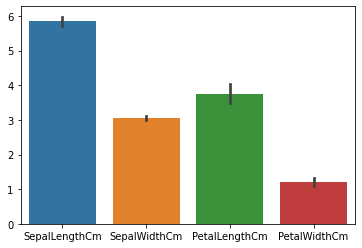

In [8]:
sns.barplot(data = data)

<AxesSubplot:>

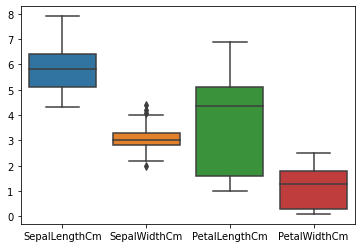

In [9]:
sns.boxplot(data = data)

In [10]:
x=data.iloc[0:,:-1].values
x

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [11]:
y=data.iloc[:,1].values
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [12]:
data = data.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , max_iter = 300 , n_init = 10 , random_state = 0)
    kmeans = kmeans.fit(data)
    wcss.append(kmeans.inertia_)

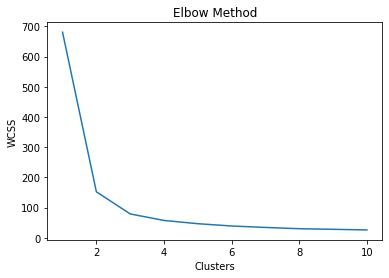

In [13]:
plt.plot(range(1,11) , wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3 , init = "k-means++" , n_init = 10 , max_iter = 300 , random_state = 0)
Kmeans_Y = kmeans.fit_predict(data)

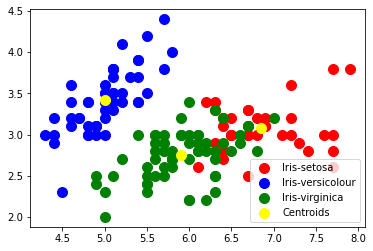

In [17]:
plt.scatter(data[Kmeans_Y == 0, 0], data[Kmeans_Y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data[Kmeans_Y == 1, 0], data[Kmeans_Y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[Kmeans_Y == 2, 0], data[Kmeans_Y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()